# Problem Statement


You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

# Importing necessary dependencies

In [1]:
pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("/content/train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

Checking and Handling Missing Values

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [7]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [8]:
integer_data_col = [x for x in df.columns if df[x].dtype == 'int64']
integer_data_col

['age', 'day', 'dur', 'num_calls']

In [9]:
ob_data_col = [x for x in df.columns if df[x].dtype == 'object']
ob_data_col

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [10]:
for i in ob_data_col:
  print(f'column "{i}" is divided into "{len(df[i].value_counts())}" categories')

column "job" is divided into "12" categories
column "marital" is divided into "3" categories
column "education_qual" is divided into "4" categories
column "call_type" is divided into "3" categories
column "mon" is divided into "12" categories
column "prev_outcome" is divided into "4" categories
column "y" is divided into "2" categories


In [11]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [14]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [15]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [16]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [17]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(45205, 11)

data visualization

In [20]:
job_count=df['job'].value_counts().index[::-1]
marital_count=df['marital'].value_counts().index[::-1]
edu_count=df['education_qual'].value_counts().index[::-1]
call_count=df['call_type'].value_counts().index[::-1]
mon_count=df['mon'].value_counts().index[::-1]
prev_count=df['prev_outcome'].value_counts().index[::-1]


In [21]:
job_count

Index(['unknown', 'student', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'retired', 'services', 'admin.', 'technician',
       'management', 'blue-collar'],
      dtype='object')

In [22]:
df['job']=pd.DataFrame(df['job'])
df['job']

<ipython-input-22-57c917283cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=pd.DataFrame(df['job'])


0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45205, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

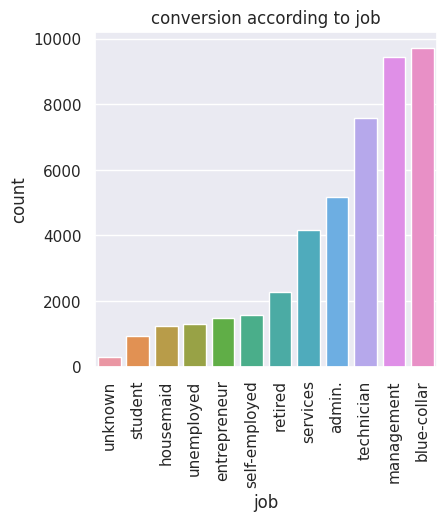

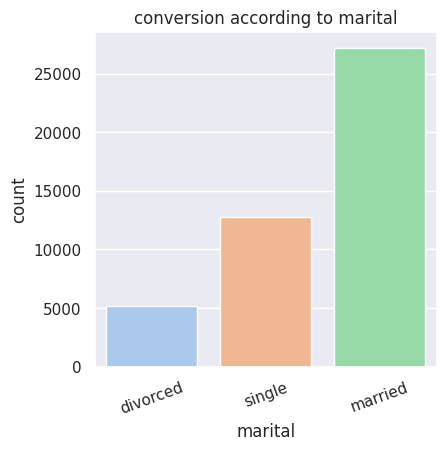

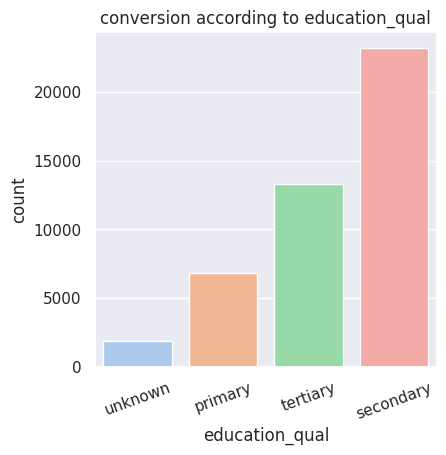

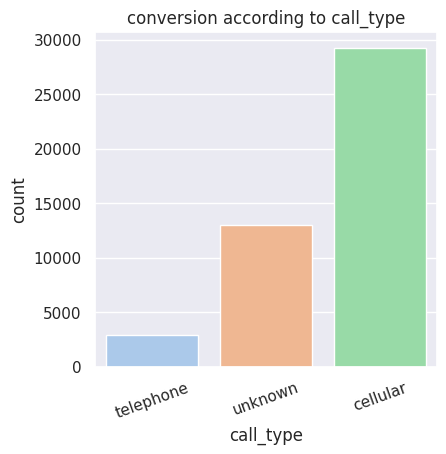

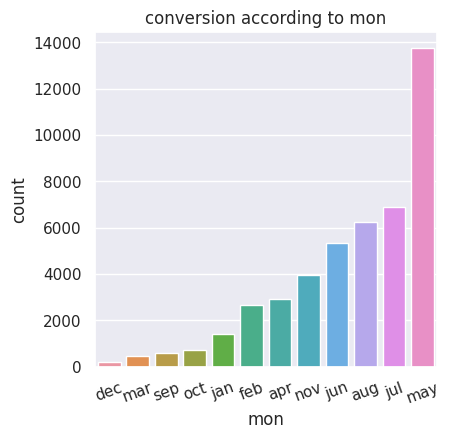

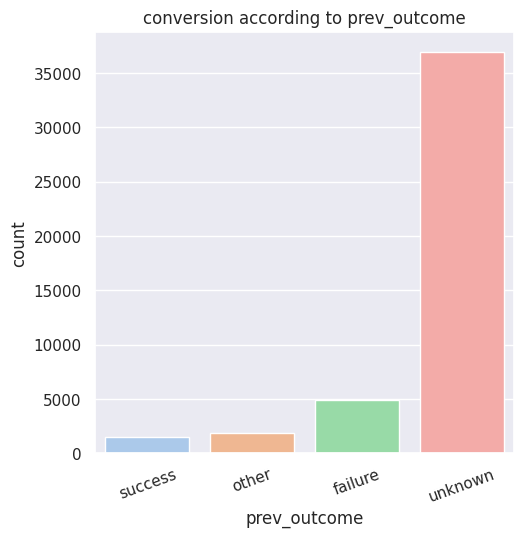

In [23]:
#plotting count plots for all the categorical columns

sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(15,20))
plt.subplot(431)
sns.countplot(df['job'],order=job_count)
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('count')
plt.title('conversion according to job')

plt.figure(figsize=(15,20))
plt.subplot(432)
sns.countplot(df['marital'],order=marital_count)
plt.xticks(rotation=20)
plt.xlabel('marital')
plt.ylabel('count')
plt.title('conversion according to marital')

plt.figure(figsize=(15,20))
plt.subplot(433)
sns.countplot(df['education_qual'],order=edu_count)
plt.xticks(rotation=20)
plt.xlabel('education_qual')
plt.ylabel('count')
plt.title('conversion according to education_qual')

plt.figure(figsize=(15,20))
plt.subplot(434)
sns.countplot(df['call_type'],order=call_count)
plt.xticks(rotation=20)
plt.xlabel('call_type')
plt.ylabel('count')
plt.title('conversion according to call_type')

plt.figure(figsize=(15,20))
plt.subplot(435)
sns.countplot(df['mon'],order=mon_count)
plt.xticks(rotation=20)
plt.xlabel('mon')
plt.ylabel('count')
plt.title('conversion according to mon')

plt.figure(figsize=(15,20))
plt.subplot(436)
sns.countplot(df['prev_outcome'],order=prev_count)
plt.xticks(rotation=20)
plt.xlabel('prev_outcome')
plt.ylabel('count')
plt.title('conversion according to prev_outcome')

plt.tight_layout()



/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

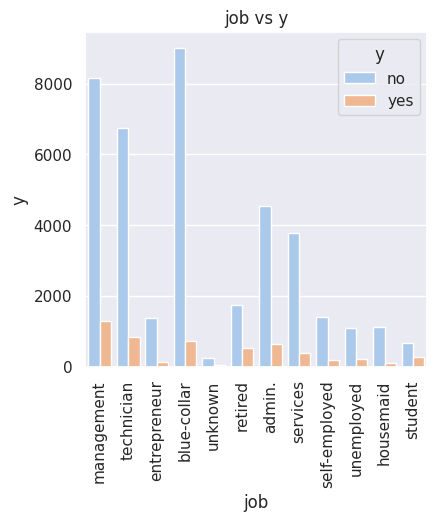

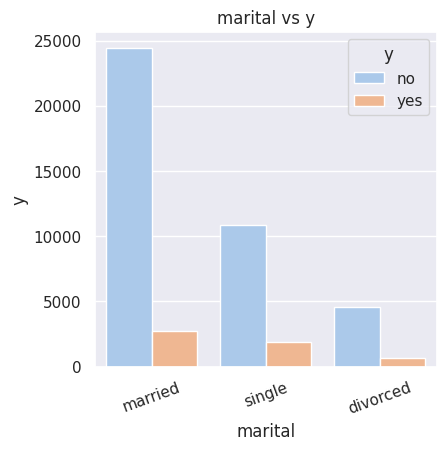

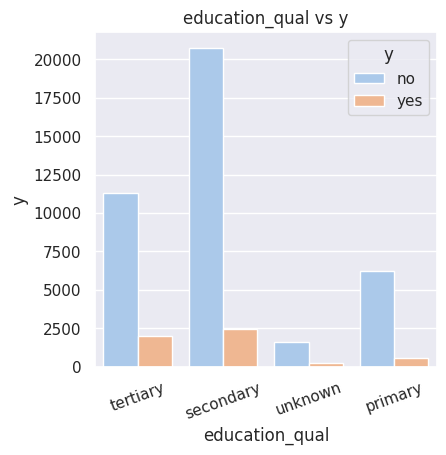

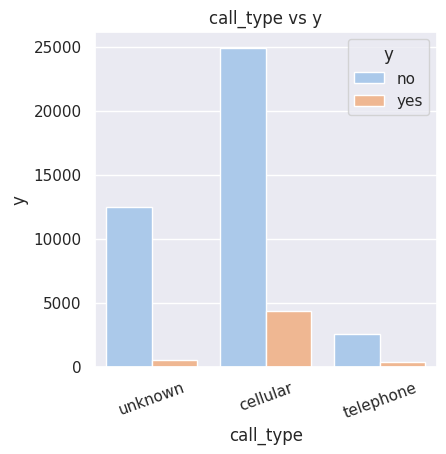

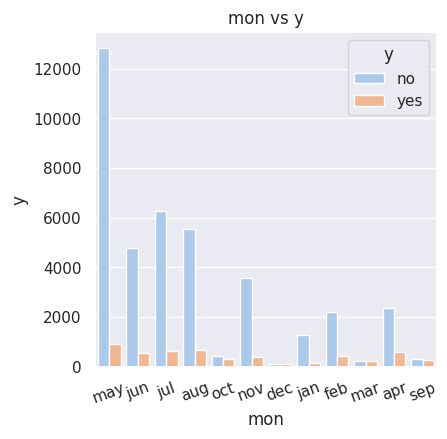

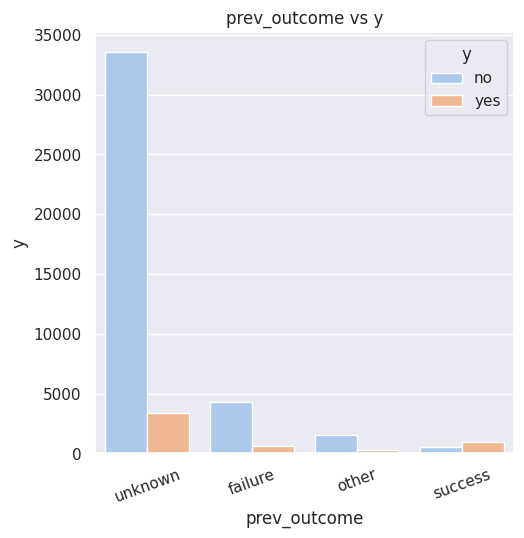

In [24]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(15,20))
plt.subplot(431)
sns.countplot(df['job'],hue=df['y'])
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('y')
plt.title('job vs y')

plt.figure(figsize=(15,20))
plt.subplot(432)
sns.countplot(df['marital'],hue=df['y'])
plt.xticks(rotation=20)
plt.xlabel('marital')
plt.ylabel('y')
plt.title('marital vs y')

plt.figure(figsize=(15,20))
plt.subplot(433)
sns.countplot(df['education_qual'],hue=df['y'])
plt.xticks(rotation=20)
plt.xlabel('education_qual')
plt.ylabel('y')
plt.title('education_qual vs y')

plt.figure(figsize=(15,20))
plt.subplot(434)
sns.countplot(df['call_type'],hue=df['y'])
plt.xticks(rotation=20)
plt.xlabel('call_type')
plt.ylabel('y')
plt.title('call_type vs y')

plt.figure(figsize=(15,20))
plt.subplot(435)
sns.countplot(df['mon'],hue=df['y'])
plt.xticks(rotation=20)
plt.xlabel('mon')
plt.ylabel('y')
plt.title('mon vs y')

plt.figure(figsize=(15,20))
plt.subplot(436)
sns.countplot(df['prev_outcome'],hue=df['y'])
plt.xticks(rotation=20)
plt.xlabel('prev_outcome')
plt.ylabel('y')
plt.title('prev_outcome vs y')

plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

Text(0.5, 1.0, 'num_calls vs y')

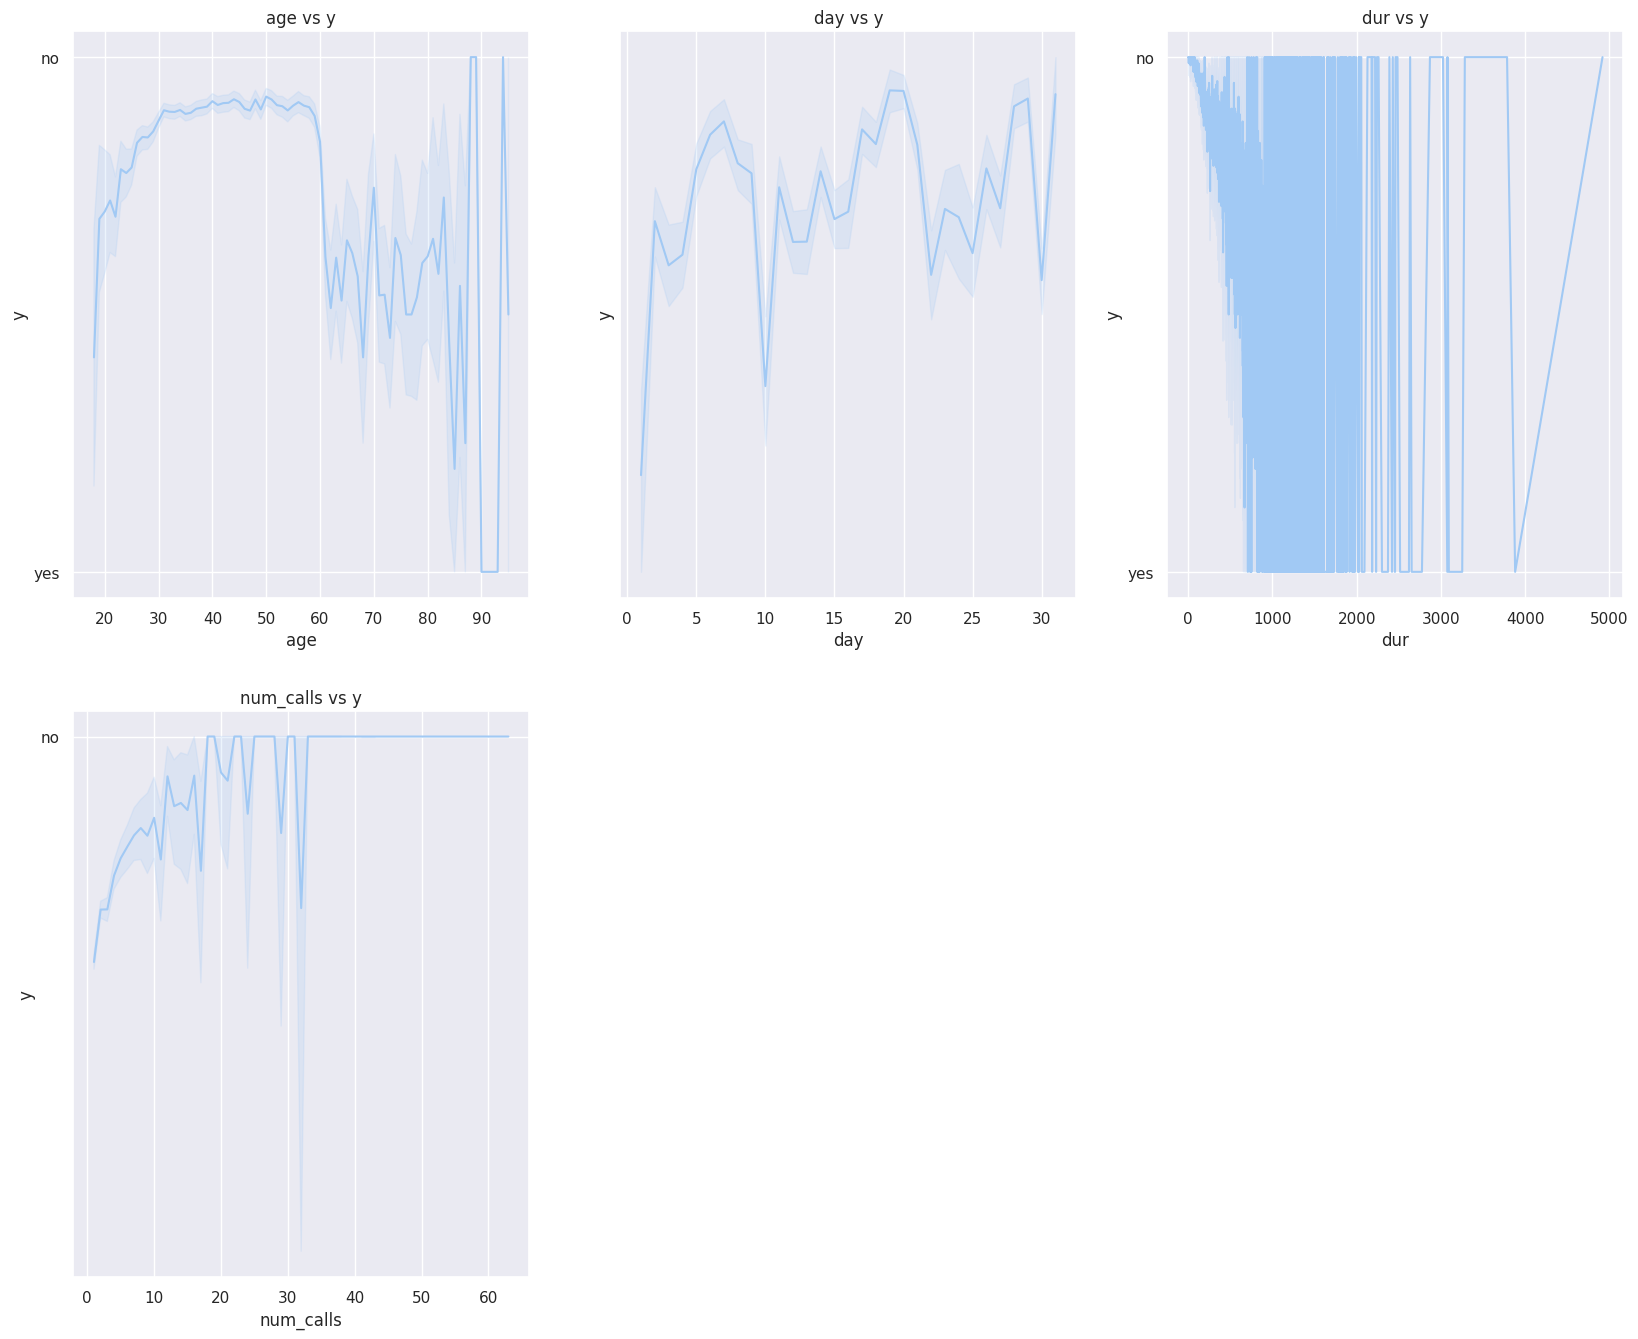

In [25]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['age'],df['y'])
plt.title('age vs y')
plt.subplot(332)
sns.lineplot(df['day'],df['y'])
plt.title('day vs y')
plt.subplot(333)
sns.lineplot(df['dur'],df['y'])
plt.title('dur vs y')
plt.subplot(334)
sns.lineplot(df['num_calls'],df['y'])
plt.title('num_calls vs y')

Encoding

In [32]:
dft = df
#encoding the catagorical variables
dft=pd.get_dummies(dft,columns=['job'])
dft['marital']=dft['marital'].map({'divorced': 0,'single':1,'married':2})
dft['education_qual']=dft['education_qual'].map({'unknown': 0,'primary':1,'secondary':2,'tertiary':3})
dft['call_type']=dft['call_type'].map({'unknown': 0,'telephone':1,'cellular':2})
dft=pd.get_dummies(dft,columns=['prev_outcome'])
dft['mon']=dft['mon'].map({'may':0,'jul':1,'aug':2,'jun':3,'nov':4,'apr':5,'feb':6,'jan':7,'oct':8,'sep':9,'mar':10,'dec':11})
dft['y']=dft['y'].map({'no':0,'yes':1})

In [ ]:
dft

In [34]:
x = dft.drop('y',axis=1)
y = dft['y']

In [35]:
x

,age,marital,education_qual,call_type,day,mon,dur,num_calls,job_admin.,job_blue-collar,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,2,3,0,5,0,261,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,1,2,0,5,0,151,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,2,0,5,0,76,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47,2,0,0,5,0,92,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,33,1,0,0,5,0,198,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,3,2,17,4,977,3,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1,2,17,4,456,2,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,2,2,2,17,4,1127,5,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,57,2,2,1,17,4,508,4,0,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

spliting data into train and test sets

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 24) (9041, 24) (36164,) (9041,)


# **Machine learning**

LogisticRegression

In [39]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
accuracy1= accuracy_score(y_test,y_pred1)
print(f"Accuracy:{accuracy1}")
cross_value_logistic = cross_val_score(model1,x_train,y_train,cv=10).mean()
cross_value_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.8994580245548058


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9005364830165321

DecisionTreeClassifier

In [40]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
accuracy2= accuracy_score(y_test,y_pred2)
print(f"Accuracy:{accuracy2}")
cross_value_decision = cross_val_score(model2,x_train,y_train,cv=10).mean()
cross_value_decision

Accuracy:0.874903218670501


0.8756222153987684

RandomForestClassifier

In [41]:
model3 = RandomForestClassifier(n_estimators=100,random_state=70)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
accuracy3= accuracy_score(y_test,y_pred3)
print(f"Accuracy:{accuracy3}")
cross_value_randomforest = cross_val_score(model3,x_train,y_train,cv=10).mean()
cross_value_randomforest

Accuracy:0.904767171773034


0.9038823320186632

KNeighborsClassifier

In [42]:
k=3
model4 = KNeighborsClassifier(n_neighbors=k)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
accuracy4= accuracy_score(y_test,y_pred4)
print(f"Accuracy:{accuracy4}")
cross_value_knn = cross_val_score(model4,x_train,y_train,cv=10).mean()
cross_value_knn

Accuracy:0.878774471850459


0.8769496337354822

XGBClassifier

In [43]:
model5 = XGBClassifier()
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
accuracy5= accuracy_score(y_test,y_pred5)
print(f"Accuracy:{accuracy5}")
cross_value_xgb = cross_val_score(model5,x_train,y_train,cv=10).mean()
cross_value_xgb

Accuracy:0.9036610994359031


0.9062327510698008

# Cross-Validation Score for Machine-Learning Models

In [44]:
print("cross validation score for logistic classifier model",cross_value_logistic)
print("cross validation score for DecisionTreeClassifier model",cross_value_decision)
print("cross validation score for RandomForestClassifier model",cross_value_randomforest)
print("cross validation score for KNeighborsClassifier model",cross_value_knn)
print("cross validation score for XGBClassifier model",cross_value_xgb)


cross validation score for logistic classifier model 0.9005364830165321
cross validation score for DecisionTreeClassifier model 0.8756222153987684
cross validation score for RandomForestClassifier model 0.9038823320186632
cross validation score for KNeighborsClassifier model 0.8769496337354822
cross validation score for XGBClassifier model 0.9062327510698008


In [45]:
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f2 = f1_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f3 = f1_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f4 = f1_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f5 = f1_score(y_test, y_pred5)


In [46]:
print("f1_score for logistic classifier model",f1)
print("f1_score for DecisionTreeClassifier model",f2)
print("f1_score for RandomForestClassifier model",f3)
print("f1_score for KNeighborsClassifier model",f4)
print("f1_score for XGBClassifier model",f5)


f1_score for logistic classifier model 0.4286612193588938
f1_score for DecisionTreeClassifier model 0.48939051918735893
f1_score for RandomForestClassifier model 0.5031736872475476
f1_score for KNeighborsClassifier model 0.35377358490566035
f1_score for XGBClassifier model 0.5413375460768826


solving problem statement based on feature importance

In [47]:
importance = model5.feature_importances_
importance

array([0.01912631, 0.01810047, 0.01665986, 0.08544811, 0.02377255,
       0.05918684, 0.08323735, 0.0146255 , 0.01312865, 0.02750017,
       0.01864582, 0.0195931 , 0.01880151, 0.01136898, 0.01397593,
       0.01476954, 0.03389585, 0.01343668, 0.01089677, 0.01152111,
       0.0248991 , 0.01665408, 0.39598888, 0.03476677], dtype=float32)

In [48]:
dft.columns

Index(['age', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')

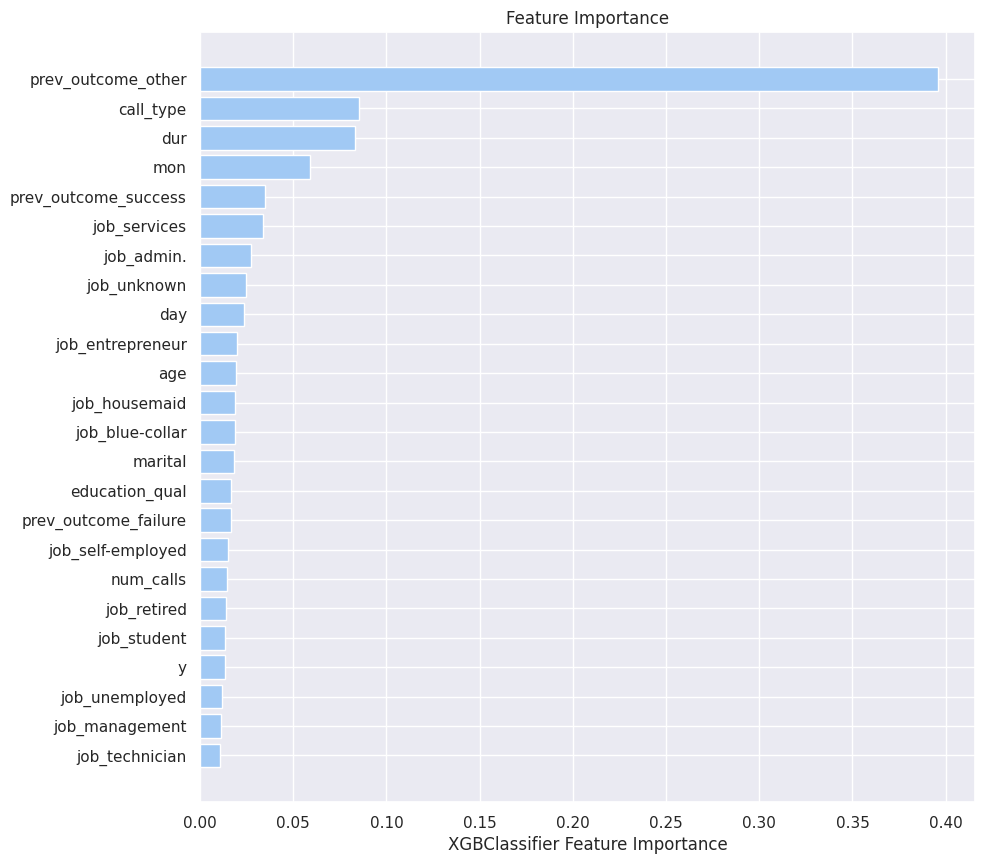

In [49]:
sorted_idx = importance.argsort()
plt.figure(figsize=(10,10))
plt.barh(dft.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("XGBClassifier Feature Importance")
plt.title("Feature Importance")
plt.show()